# Meteorological data for SnowEx 2020
---
*J. Michelle Hu  
University of Utah  
August 2024*  


Items of note to plot:
- freezing depth
- time series of soil moisture, soil temperature
- precipitation events
- overlying temperature conditions
>> figure out if any of the data is not useful and should be dropped

## Study plot  
- ~~Use Mesa West (MW) station~~  
- Plot a map of all the stations - Mike 
- Find precip gauge and get actual P events  
- ~~overplot snow depth~~  

In [35]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import hvplot.pandas

In [36]:
palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False)

In [37]:
sns.set_palette(palette)

In [38]:
# start = datetime(2019, 11, 5)
# end = datetime(2019, 11, 6)

# start = datetime(2020, 2, 7)
# end = datetime(2020, 2, 10)

start = datetime(2019, 10, 1)
end = datetime(2020, 4, 1)

# start = datetime(2020, 1, 1)
# end = datetime(2020, 6, 1)
start, end

(datetime.datetime(2019, 10, 1, 0, 0), datetime.datetime(2020, 4, 1, 0, 0))

In [39]:
# Read in and clean up PoR met data
# df = pd.read_csv('./SNEX_Met_GMSP2_final_output.csv')
df = pd.read_csv('./SNEX_Met_MW_final_output.csv')
# df = pd.read_csv('./cache/SNEX_Met_GMSP2_final_output.csv') # getting access denied
df['datetime'] = pd.to_datetime(df['TIMESTAMP'])
df = df.drop(columns=['TIMESTAMP']).set_index('datetime')
variables = ['RH_10ft', 'RH_20ft','AirTC_20ft_Avg', 'AirTC_10ft_Avg',
             'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg', 
             'TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 
             'SnowDepthFilter(m)', 'DistanceSensToGnd(m)']

drop = [col for col in df.columns if col not in variables]
df.drop(columns=drop, inplace=True)
# Clean the data a bit
# Replace no data values with nan
ndv = -9999
df[df==ndv] = np.nan
filtered_df = df.loc[(df.index >= start)
                     & (df.index < end)]
filtered_df.head()

RH_10ft  RH_20ft  AirTC_20ft_Avg  AirTC_10ft_Avg  \
datetime                                                                
2019-10-01 00:00:00   26.035   26.148          11.420          11.333   
2019-10-01 01:00:00   27.757   27.628          10.058           9.875   
2019-10-01 02:00:00   27.495   27.403           9.722           9.553   
2019-10-01 03:00:00   26.545   26.437           9.557           9.375   
2019-10-01 04:00:00   26.463   26.340           9.505           9.318   

                     SM_5cm_Avg  SM_20cm_Avg  SM_50cm_Avg  TC_5cm_Avg  \
datetime                                                                
2019-10-01 00:00:00       0.006        0.115          NaN      14.195   
2019-10-01 01:00:00       0.002        0.114          NaN      13.322   
2019-10-01 02:00:00       0.005        0.113          NaN      12.240   
2019-10-01 03:00:00       0.002        0.113          NaN      11.292   
2019-10-01 04:00:00       0.002        0.114          NaN      10.488   

                     TC_20cm_Avg  TC_50cm_Avg  DistanceSensToGnd(m)  \
datetime                                                              
2019-10-01 00:00:00       10.873          NaN                 0.042   
2019-10-01 01:00:00       11.132          NaN                 0.042   
2019-10-01 02:00:00       11.255          NaN                 0.056   
2019-10-01 03:00:00       11.300          NaN                 0.070   
2019-10-01 04:00:00       11.300          NaN                 0.071   

                     SnowDepthFilter(m)  
datetime                                 
2019-10-01 00:00:00               0.042  
2019-10-01 01:00:00               0.042  
2019-10-01 02:00:00               0.056  
2019-10-01 03:00:00               0.070  
2019-10-01 04:00:00               0.071

### Set some defaults

In [40]:
timeperiod = 'h'
figsize = (12, 4)

### Plot air temperature

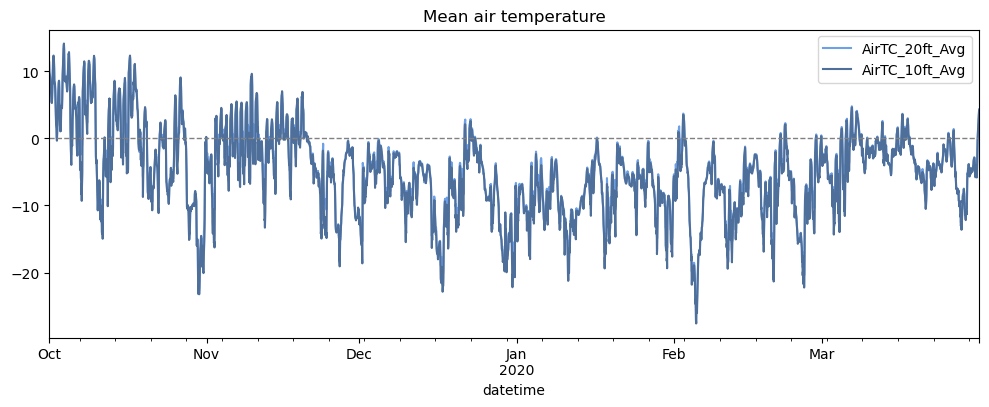

In [41]:
# for var in ['AirTC_20ft_Avg', 'AirTC_10ft_Avg']:
#     # print(var)
#     filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
# plt.title('Mean air temperature')
# ax = plt.gca()
# ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
# plt.legend();

In [42]:
filtered_df.hvplot(y=['AirTC_20ft_Avg', 'AirTC_10ft_Avg'],
                   color=palette,
                   width=1200, height=300
                  )

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

### Plot soil temperature

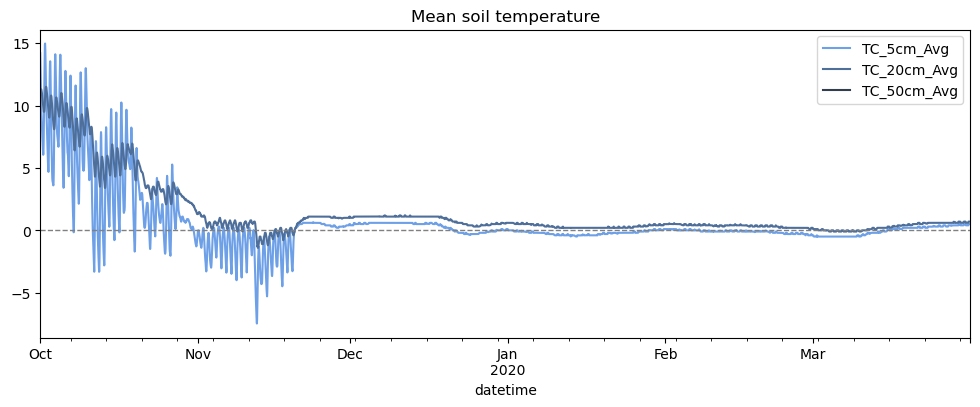

In [43]:
# for var in ['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg']:
#     # print(var)
#     filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
# plt.title('Mean soil temperature')
# ax = plt.gca()
# ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
# plt.legend();

In [44]:
filtered_df.hvplot(y=['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg'],
                   color=palette,
                   width=1200, height=300
                  )

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

Based on soil temperature, plot the freezing depths...  
temp at 50 cm < 0 --> freezing depth is at least 50 cm  
temp at 20 cm < 0 --> freezing depth is at least 20 cm  
temp at 5 cm < 0 --> freezing depth is at least 5 cm  

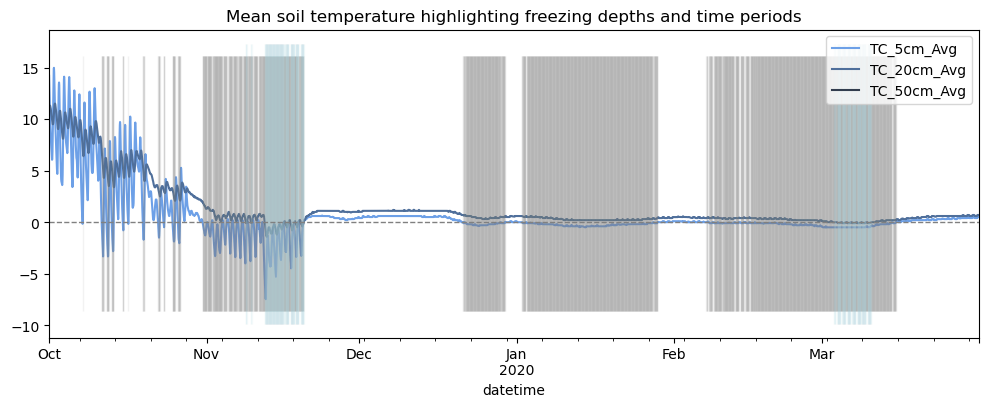

In [45]:
fig, ax = plt.subplots(figsize=figsize)
for var in ['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg']:
    filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)

# Plot times when temp at 50 cm < 0
this_var = filtered_df['TC_5cm_Avg'].resample(timeperiod).mean()
if len(this_var[this_var<0])>0:
    ax.vlines(x=this_var[this_var<0].index,
              ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='gray', linewidth=1, alpha=0.1);

# Plot times when temp at 20 cm < 0
this_var = filtered_df['TC_20cm_Avg'].resample(timeperiod).mean()
if len(this_var[this_var<0])>0:
    ax.vlines(x=this_var[this_var<0].index,
              ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightblue', linewidth=1, alpha=0.1);

# Plot times when temp at 5 cm < 0
this_var = filtered_df['TC_50cm_Avg'].resample(timeperiod).mean()
if len(this_var[this_var<0])>0:
    ax.vlines(x=this_var[this_var<0].index,
              ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='k', linewidth=1, alpha=0.1);
    
plt.title('Mean soil temperature highlighting freezing depths and time periods')
ax = plt.gca()
ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
plt.legend();

### Plot soil moisture

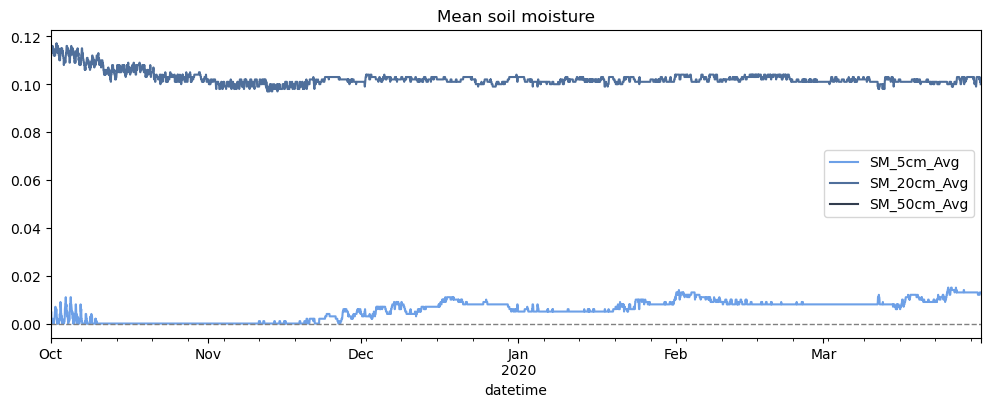

In [46]:
# for var in ['SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg']:
#     # print(var)
#     filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', figsize=figsize)
# plt.title('Mean soil moisture')
# ax = plt.gca()
# ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'gray', linestyle='--', linewidth=1)
# plt.legend();

In [47]:
filtered_df.hvplot(y=['SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg'],
                   color=palette,
                   width=1200, height=300
                  )

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

### Plot soil temp and moisture on the same plot

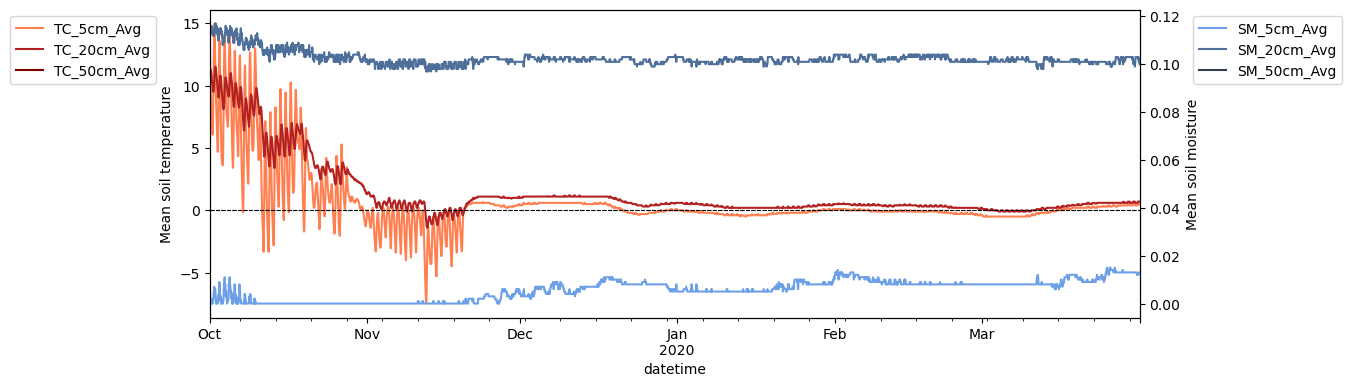

In [48]:
colors = ['coral', 'firebrick', 'maroon']

fig, ax = plt.subplots(1, figsize=figsize)
ax2 = ax.twinx()
for jdx, var in enumerate(['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg']):
    # print(var)
    if jdx < 3:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax, color=colors[jdx-3])
        ax.set_ylabel('Mean soil temperature')
        ax.legend(bbox_to_anchor=(-0.05,1));
        ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'k', linestyle='--', linewidth=0.75)
        
    else:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax2)
        ax2.set_ylabel('Mean soil moisture')
        ax2.legend(bbox_to_anchor=(1.05,1));

In [49]:
filtered_df.hvplot(y=['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg'],
                   color=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False),
                   width=1000, height=400
                  )

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

In [50]:
# filtered_df.hvplot(y=['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg'],
#                    color=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False), subplots=True, 
#                    width=250, height=200)

:NdLayout   [Variable]
   :Curve   [datetime]   (value)

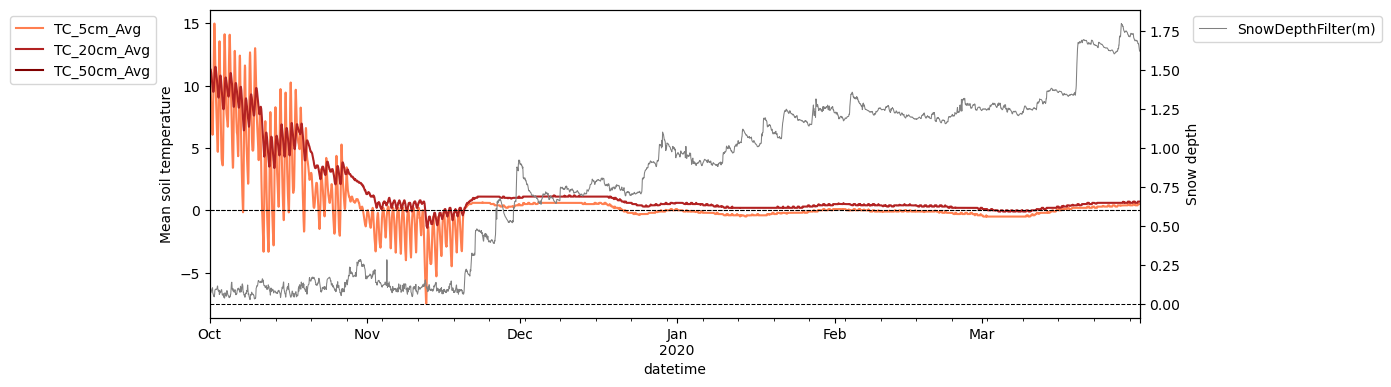

In [76]:
colors = ['coral', 'firebrick', 'maroon']

fig, ax = plt.subplots(1, figsize=figsize)
ax2 = ax.twinx()
for jdx, var in enumerate(['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SnowDepthFilter(m)']):
    if jdx < 3:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax, color=colors[jdx])
        ax.set_ylabel('Mean soil temperature')
        ax.legend(bbox_to_anchor=(-0.05,1));
        ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'k', linestyle='--', linewidth=0.75)
    else:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax2, color='gray', linewidth=0.75)
        ax2.set_ylabel('Snow depth')
        ax2.legend(bbox_to_anchor=(1.05,1));
        ax2.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'k', linestyle='--', linewidth=0.75)

### Plot soil temp, soil moisture, and snow depth on the same plot

In [79]:
filtered_df.columns

Index(['RH_10ft', 'RH_20ft', 'AirTC_20ft_Avg', 'AirTC_10ft_Avg', 'SM_5cm_Avg',
       'SM_20cm_Avg', 'SM_50cm_Avg', 'TC_5cm_Avg', 'TC_20cm_Avg',
       'TC_50cm_Avg', 'DistanceSensToGnd(m)', 'SnowDepthFilter(m)'],
      dtype='object')

In [80]:
sm_cols = [col for col in filtered_df.columns if 'SM_' in col]
sm_cols

['SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg']

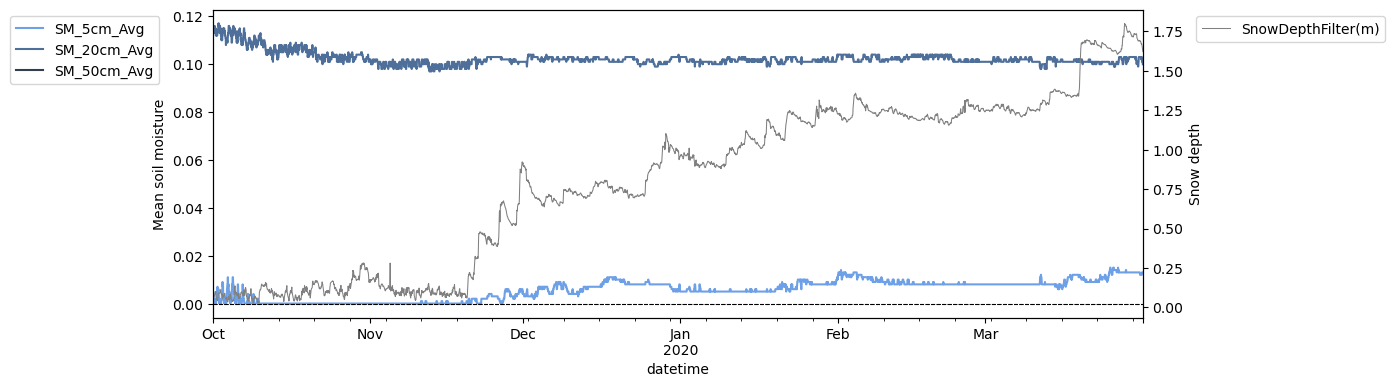

In [77]:
fig, ax = plt.subplots(1, figsize=figsize)
ax2 = ax.twinx()
for jdx, var in enumerate(['SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg', 'SnowDepthFilter(m)']):
    if jdx < 3:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax)
        ax.set_ylabel('Mean soil moisture')
        ax.legend(bbox_to_anchor=(-0.05,1));
        ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], 'k', linestyle='--', linewidth=0.75)
    else:
        filtered_df[var].resample(timeperiod).mean().plot(label=f'{var}', ax=ax2, color='gray', linewidth=0.75)
        ax2.set_ylabel('Snow depth')
        ax2.legend(bbox_to_anchor=(1.05,1));

In [78]:
filtered_df.hvplot(y=['TC_5cm_Avg', 'TC_20cm_Avg', 'TC_50cm_Avg', 'SM_5cm_Avg', 'SM_20cm_Avg', 'SM_50cm_Avg'],
                   color=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=False),
                   width=1000, height=400
                  )

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

### Plot precipitation events

Using RH?

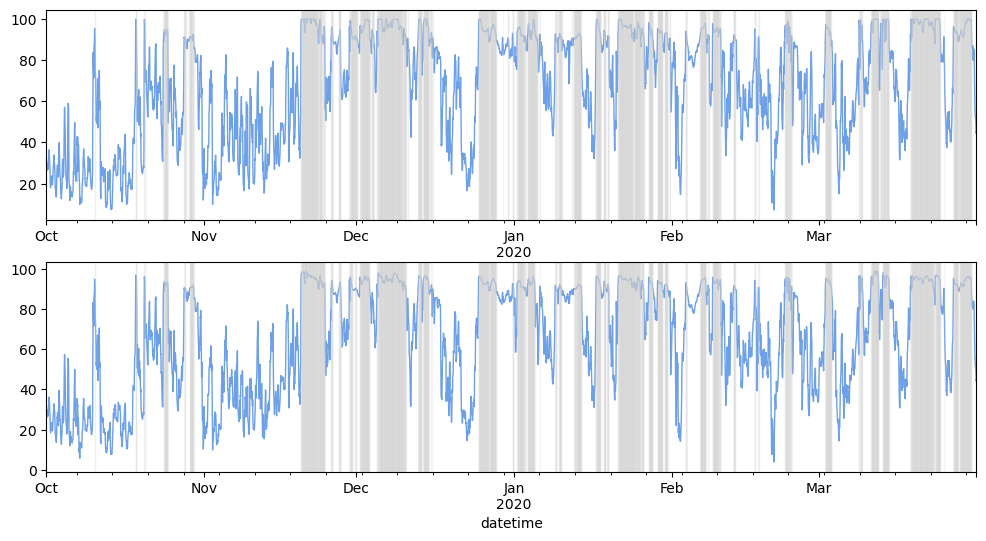

In [17]:
RH_thresh = 90
var = 'RH_10ft'
fig, axa = plt.subplots(2, 1, figsize=(12,6))
ax = axa[0]
filtered_df[var].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df[var].resample('h').mean()[filtered_df[var].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.2);
ax.set_ylim(ylims);


var = 'RH_20ft'
ax = axa[1]
filtered_df[var].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df[var].resample('h').mean()[filtered_df[var].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.2);
ax.set_ylim(ylims);

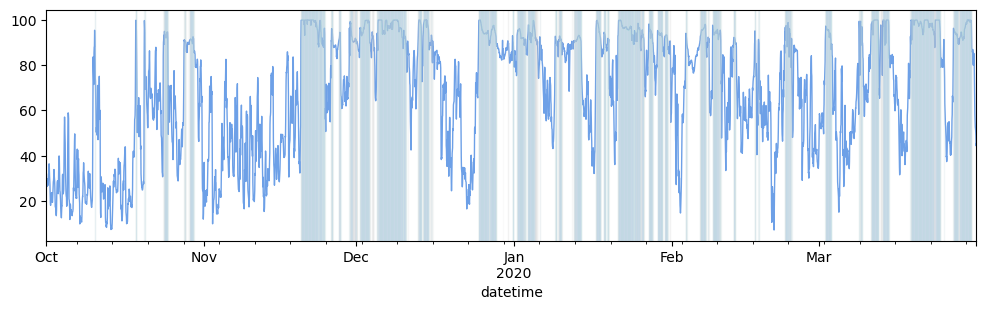

In [18]:
RH_thresh = 90
fig, ax = plt.subplots(figsize=(12,3))
filtered_df['RH_10ft'].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df['RH_10ft'].resample('h').mean()[filtered_df['RH_10ft'].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.1);
ax.vlines(x=filtered_df['RH_20ft'].resample('h').mean()[filtered_df['RH_20ft'].resample('h').mean()>=RH_thresh].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightblue', linewidth=1, alpha=0.1);

ax.set_ylim(ylims);

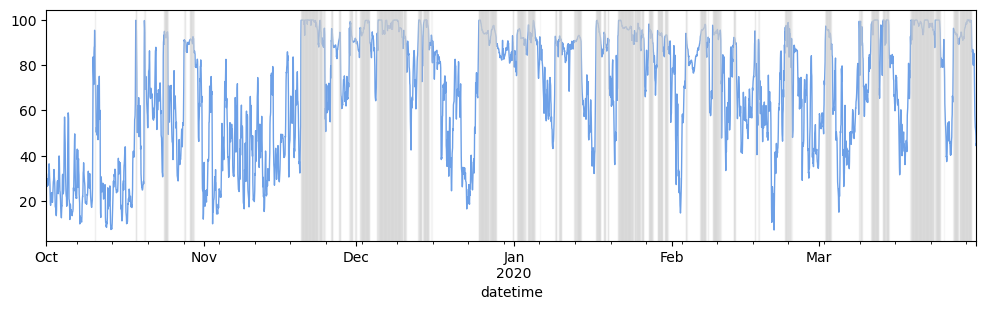

In [19]:
RH_thresh = 90
var = 'RH_10ft'
fig, ax = plt.subplots(figsize=(12,3))
filtered_df[var].resample('h').mean().plot(ax=ax, linewidth=1)
ylims = ax.get_ylim()
ax.vlines(x=filtered_df[var].resample('h').mean()[(filtered_df[var].resample('h').mean()>=RH_thresh)&(filtered_df['RH_20ft'].resample('h').mean()>=RH_thresh)].index, 
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], color='lightgray', linewidth=1, alpha=0.2);
ax.set_ylim(ylims);

In [20]:
# !python3 -m pip install metloom
# from metloom.pointdata import SnowExMet
# from metloom.variables import SnowExVariables
# for f in SnowExMet.ALLOWED_STATIONS:
#     print(f)
# variables = [SnowExMet.ALLOWED_VARIABLES.PRECIPITATION,
#              SnowExMet.ALLOWED_VARIABLES.SNOWDEPTH,
#              SnowExMet.ALLOWED_VARIABLES.SWE,
#              SnowExMet.ALLOWED_VARIABLES.TEMP_10FT,
#              SnowExMet.ALLOWED_VARIABLES.TEMP_20FT,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND5CM,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND20CM,
#              SnowExMet.ALLOWED_VARIABLES.TEMPGROUND50CM]

In [21]:
# # Mesa West Study Plot
# mw = SnowExMet('MW')
# mw
# # df_mw = mw.get_hourly_data(datetime.timestamp(start), datetime.timestamp(end), [SnowExVariables.SNOWDEPTH])
# # df_mw

In [22]:
# roi_fn = "/home/jovyan/shared-public/swesarr_project/base-layers/swesarr-roi.shp"
# poly = gpd.read_file(roi_fn)
# poly